# Análisis socio-econónicos y de criminalidad en Costa Rica

## Introducción

Haciendo uso de herramientas tecnológicas como la televisión e internet, nos enteramos de lo sucedido en nuestro país, vemos como día a día la situación económica de nuestro país cambia, y por ende, la situación de nuestra sociedad también. 
En este punto, es importante decir que, para que un país avance su nivel económico y social debe ser bueno, y mostrar las cualidades para que sea un país con una buena reputación.
Sin embargo, hoy, nos enfrentamos a muchos problemas económicos, y cada día, las personas se ven cada vez más envueltas en situaciones complicadas con el dinero y esto se ve agrabado con el hecho de que la delicuencia sigue aumentanto. Muchas personas viven con el miedo contante de ser victimas de algún delito.
Este aumento en la delincuencia, puede verse influenciado por los mismos problemas económicos que enfrentan las diferentes familias a lo largo de nuestro país, porque apesar que se un acto delictivo puede ocurrir en cualquier parte del país, estas situaciones se ven mayormente es los sectores más vulnerables de la población.
Investigaciones en análisis de datos asociados a delitos, han concluido que algunos factores, como son la educación, la pobreza y el desempleo pueden influir en el aumento o disminución de la tasa de delitos de una región (Suhong, Param, Parminder y Pooya, 2018) y es por eso que se requiere integrar ambas fuentes de datos. 
Por lo que, este trabajo se basa en la recopilación de datos criminológicos y de población para poder hacer un contraste en como se ve afectado uno de los puntos con respecto al otro, y de esta forma poder dar una idea más clara de la influencia de la delincuencia y factores poblacionales en la economía básica de un país.

## Inicio de la funcionalidad

In [1]:
import findspark       # Importa la funcionalidad para poder encontrar las caracteristicas necesarias de pyspark 
findspark.init()       # Inicializa el findspark

In [2]:
# Importa los paquetes necesarios para una correcta implementación de la aplicación

from pyspark.sql import SparkSession     # Importa la funcionalidad necesaria para poder hacer uso de pyspark por sparkSession 
from pyspark.sql import functions as F   # Importa la funcionalidad necesaria para poder hacer uso de las funciones de pyspark
from pyspark.sql.functions import lower, col, isnan, when, trim
from pyspark.sql.types import *          # Importa la funcionalidad de los tipos usados para la lectura de los datos con pyspark
from pyspark.sql import SQLContext       # Importa la funcionalidad para la conexión con la base de datos
import re                                # Importa la funcionalidad de expresiones regulares
import unicodedata
import psycopg2                          # Importa el paquete de conexión para Postgresql

import seaborn as sns                    # Importa el paquete necesario para llevar a cabo la gráfica de los datos
import matplotlib.pyplot as plt          # Importa el paquete necesario para llevar a cabo la gráfica de los datos

import pandas as pd                      # Importa pandas el cuál ayuda a un mejor procesamiento de los datos

In [3]:
spark=SparkSession.builder.getOrCreate()      # Se abre la sesión de spark

In [4]:
spark                                    # Revisa si la sesión se abrió correctamente

### Cargando datos de OIJ

In [5]:
# Asigna a la variable OIJ el resultado de la lectura del archivo con la información del OIJ
OIJ = spark.createDataFrame(pd.read_excel('C:/Users/anner/Desktop/Datos/U/U-1-2021/Bases2/Proyectos/Proyecto3/estadisticas/Estadisticas.xlsx'))

In [6]:
type(OIJ)
#print(OIJ)
OIJ.show()

+------+-----------+-------------------+-------------------+-----------+--------------------+-------------+------+------------+----------+----------+-------------+
|Delito|  SubDelito|              Fecha|               Hora|    Victima|          SubVictima|         Edad|Genero|Nacionalidad| Provincia|    Canton|     Distrito|
+------+-----------+-------------------+-------------------+-----------+--------------------+-------------+------+------------+----------+----------+-------------+
|ASALTO|ARMA BLANCA|2021-01-07 00:00:00|12:00:00 - 14:59:59|    PERSONA|    PEATON [PERSONA]|Mayor de edad|HOMBRE|  COSTA RICA|   CARTAGO|  LA UNION|    TRES RIOS|
|ASALTO|ARMA BLANCA|2021-01-09 00:00:00|12:00:00 - 14:59:59|    PERSONA|CLIENTE LOCAL COM...|Mayor de edad|HOMBRE|  COSTA RICA|  ALAJUELA|SAN CARLOS|      QUESADA|
|ASALTO|ARMA BLANCA|2021-01-14 00:00:00|06:00:00 - 08:59:59|EDIFICACION|PULPERIA/ABASTECE...|Mayor de edad| MUJER|  COSTA RICA|  SAN JOSE|  SAN JOSE|       CARMEN|
|ASALTO|ARMA BLA

De esta forma vemos que los datos del OIJ fueron cargados de forma correcta y que los datos pueden ser visualizados y utilizados para hacer un análisis.

### Cargando datos del INEC

In [7]:
# Asigna a la variable INEC el resultado de la lectura del archivo con la información del INEC
INEC = pd.read_excel('C:/Users/anner/Desktop/Datos/U/U-1-2021/Bases2/Proyectos/Proyecto3/estadisticas/reempleocenso2011-22.xlsx')

# Prepara el esquema que se va a utilizar en el DataFrame con la información del INEC
INEC_schema = StructType([StructField("Unnamed: 1", StringType(), True)\
                         ,StructField("Unnamed: 2", StringType(), True)\
                         ,StructField("Unnamed: 3", StringType(), True)\
                         ,StructField("Unnamed: 4", StringType(), True)\
                         ,StructField("Unnamed: 5", StringType(), True)\
                         ,StructField("Unnamed: 6", StringType(), True)\
                         ,StructField("Unnamed: 7", StringType(), True)\
                         ,StructField("Unnamed: 8", StringType(), True)\
                         ,StructField("Unnamed: 9", StringType(), True)\
                         ,StructField("Unnamed: 10", StringType(), True)])
INEC3 = INEC.drop(columns=["Unnamed: 0"])
INEC4 = INEC3.dropna()
INEC5 = INEC4.drop_duplicates(subset=['Unnamed: 1'], keep="last")

# Crea el DataFrame con la información del INEC
INEC1 = spark.createDataFrame(INEC5, INEC_schema)

In [8]:
type(INEC)
INEC1.show()

+--------------------+----------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-----------------+
|          Unnamed: 1|Unnamed: 2|        Unnamed: 3|        Unnamed: 4|        Unnamed: 5|        Unnamed: 6|        Unnamed: 7|         Unnamed: 8|        Unnamed: 9|      Unnamed: 10|
+--------------------+----------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-----------------+
|         Costa Rica |   3233882|53.479687879768036| 51.66026466024425| 3.402082718983272| 46.52031212023197|1.4873007337508022| 13.855894056859919|17.898795186492297|68.24531075664778|
|            San José|    225856| 56.70825658826863| 54.47718900538396|3.9342905550480562| 43.29174341173137|1.2490337994519007|  0.653446033810143|18.906046814044213|80.44050715214564|
|   Carmen           |      2431| 56.31427396133278|54.792266556972436

De esta forma vemos que los datos del INEC fueron cargados de forma correcta y que los datos pueden ser visualizados y utilizados para hacer un análisis.


### Normalización de Datos

En esta sección se plantearán las funciones requeridas para normalizar la información del archivo, es decir, en la columna de DISTRITO se eliminarán los espacios en blanco de ambos conjuntos, y convertir el contenido de la columna en minúsculas.

#### Función que elimina espacios en blanco

In [9]:
# Entradas: Recibe la tabla en la que aplicará la limpieza
# Salida: Retorna un DataFrame con las columnas limpias de datos en blanco
def eliminarEspacios(tabla):
    return tabla.dropna()

##### Limpiar INEC

In [10]:
# Entrada: Recibe el DataFrame del INEC
# Salida: Retorna un Nuevo DataFrame con las correcciones requeridas para poder continuar con el análisis
# Esta función es requerida dado que la información extraida del documento original del INEC no cuenta con la estructura
#       para hacer un correcto análisis, contiene valores nulos e información que se puede categorizar como irrelevante.


def limpiarINEC(tabla):
    tabla2=tabla.select("Unnamed: 1", "Unnamed: 2","Unnamed: 3","Unnamed: 4","Unnamed: 5",
             "Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10").withColumnRenamed(
             "Unnamed: 1", "Provincia, cantón y distrito").withColumnRenamed(
             "Unnamed: 2", "Población de 15 años y más").withColumnRenamed(
             "Unnamed: 3", "Tasa neta de participación").withColumnRenamed(
             "Unnamed: 4", "Tasa de ocupación").withColumnRenamed(
             "Unnamed: 5", "Tasa de desempleo abierto").withColumnRenamed(
             "Unnamed: 6", "Porcentaje de población económicamente inactiva").withColumnRenamed(
             "Unnamed: 7", "Relación de dependencia económica").withColumnRenamed(
             "Unnamed: 8", "Sector Primario").withColumnRenamed(
             "Unnamed: 9", "Sector Secundario").withColumnRenamed(
             "Unnamed: 10", "Sector Terciario")
    return tabla2

    

In [11]:
INEC2=limpiarINEC(INEC1)
INEC2=eliminarEspacios(INEC2)
INEC2.show()

+----------------------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+-----------------+
|Provincia, cantón y distrito|Población de 15 años y más|Tasa neta de participación| Tasa de ocupación|Tasa de desempleo abierto|Porcentaje de población económicamente inactiva|Relación de dependencia económica|    Sector Primario| Sector Secundario| Sector Terciario|
+----------------------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+-----------------+
|                 Costa Rica |                   3233882|        53.479687879768036| 51.66026466024425|        3.402082718983272|                              46.52031212023197|               1

In [12]:
OIJ=eliminarEspacios(OIJ)
OIJ.show()

+------+-----------+-------------------+-------------------+-----------+--------------------+-------------+------+------------+----------+----------+-------------+
|Delito|  SubDelito|              Fecha|               Hora|    Victima|          SubVictima|         Edad|Genero|Nacionalidad| Provincia|    Canton|     Distrito|
+------+-----------+-------------------+-------------------+-----------+--------------------+-------------+------+------------+----------+----------+-------------+
|ASALTO|ARMA BLANCA|2021-01-07 00:00:00|12:00:00 - 14:59:59|    PERSONA|    PEATON [PERSONA]|Mayor de edad|HOMBRE|  COSTA RICA|   CARTAGO|  LA UNION|    TRES RIOS|
|ASALTO|ARMA BLANCA|2021-01-09 00:00:00|12:00:00 - 14:59:59|    PERSONA|CLIENTE LOCAL COM...|Mayor de edad|HOMBRE|  COSTA RICA|  ALAJUELA|SAN CARLOS|      QUESADA|
|ASALTO|ARMA BLANCA|2021-01-14 00:00:00|06:00:00 - 08:59:59|EDIFICACION|PULPERIA/ABASTECE...|Mayor de edad| MUJER|  COSTA RICA|  SAN JOSE|  SAN JOSE|       CARMEN|
|ASALTO|ARMA BLA

#### Función que convierte a minúsculas los datos

In [13]:
# Entrada: Recibe el DataFrame correspodiente y el nombre de la columna que se va a operar
# Salida: Retorna el resultado de aplicar 'lower' a todos los valores de la columna
# Spark tiene una funcionalidad que permite tomar el nombre del DataFrame y de una columna haciendo uso de un
# select y hace el cambio a los valores que correspondan a esa columna
def minus(tabla, columna):
    return tabla.select("*", lower(col(columna)))                

In [14]:
# Asigna a la variable OIJ el DataFrame resultante de la llamada a la función minus
OIJ = minus(OIJ, 'Distrito')

In [15]:
OIJ.show()

+------+-----------+-------------------+-------------------+-----------+--------------------+-------------+------+------------+----------+----------+-------------+---------------+
|Delito|  SubDelito|              Fecha|               Hora|    Victima|          SubVictima|         Edad|Genero|Nacionalidad| Provincia|    Canton|     Distrito|lower(Distrito)|
+------+-----------+-------------------+-------------------+-----------+--------------------+-------------+------+------------+----------+----------+-------------+---------------+
|ASALTO|ARMA BLANCA|2021-01-07 00:00:00|12:00:00 - 14:59:59|    PERSONA|    PEATON [PERSONA]|Mayor de edad|HOMBRE|  COSTA RICA|   CARTAGO|  LA UNION|    TRES RIOS|      tres rios|
|ASALTO|ARMA BLANCA|2021-01-09 00:00:00|12:00:00 - 14:59:59|    PERSONA|CLIENTE LOCAL COM...|Mayor de edad|HOMBRE|  COSTA RICA|  ALAJUELA|SAN CARLOS|      QUESADA|        quesada|
|ASALTO|ARMA BLANCA|2021-01-14 00:00:00|06:00:00 - 08:59:59|EDIFICACION|PULPERIA/ABASTECE...|Mayor d

In [16]:
# Asigna a la variable INEC2 el DataFrame resultante de la llamada a la función minus
INEC2 = minus(INEC2, 'Provincia, cantón y distrito')

In [17]:
INEC2.show()

+----------------------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+-----------------+-----------------------------------+
|Provincia, cantón y distrito|Población de 15 años y más|Tasa neta de participación| Tasa de ocupación|Tasa de desempleo abierto|Porcentaje de población económicamente inactiva|Relación de dependencia económica|    Sector Primario| Sector Secundario| Sector Terciario|lower(Provincia, cantón y distrito)|
+----------------------------+--------------------------+--------------------------+------------------+-------------------------+-----------------------------------------------+---------------------------------+-------------------+------------------+-----------------+-----------------------------------+
|                 Costa Rica |                   3233882|        53.479687879768036| 

### Conjunto de datos que no coinciden

En esta sección se muestra una lista que corresponde al conjunto de datos del OIJ que no coinciden con ningún distrito del conjunto de datos del Inec.

In [18]:
# Estructuras donde se guardará la información para hacer la comparación de los datos entre los conjuntos de información
datosOIJ={}
datosINEC={}
ListaDiferentes=[]


# Entrada: Recibe una cadena de caracteres
# Salida: Devuelve una cadena de caracteres en la cuál no se cuenta con acentos
# Esta función se realiza con el fin de hacer coincidir de una mejor manera los valores en la columna de distrito
#        en el DataFrame de OIJ y en la columna de distrito en el DataFrame de INEC2.
def elimina_tildes(cadena):
    s = ''.join((c for c in unicodedata.normalize('NFD',cadena) if unicodedata.category(c) != 'Mn'))
    return s

In [19]:
# Asigna a la variable OIJData la lista resultante de la llamada a la función select de spark
OIJData = OIJ.select("lower(Distrito)").collect()

In [20]:
# Haciendo uso de expresiones regulares, obtenemos la información correspondiente de los 
#        distritos en el conjunto del OIJ y son agregados a un diccionario.
# Se agrega a un diccionario para agilizar la búsqueda en la comparación de datos.

regex = r"'\s*(.+\w)\s*'"
for i in OIJData:
    matches = re.finditer(regex, str(i), re.MULTILINE)
    for match in matches:
        dato=elimina_tildes(match.group(1))
        datosOIJ[dato]=dato


In [21]:
print(datosOIJ)

{'tres rios': 'tres rios', 'quesada': 'quesada', 'carmen': 'carmen', 'merced': 'merced', 'leon xiii': 'leon xiii', 'siquirres': 'siquirres', 'alajuela': 'alajuela', 'san juan': 'san juan', 'san rafael': 'san rafael', 'san jose': 'san jose', 'occidental': 'occidental', 'san francisco': 'san francisco', 'liberia': 'liberia', 'limon': 'limon', 'tacares': 'tacares', 'guacima': 'guacima', 'colorado': 'colorado', 'hospital': 'hospital', 'san sebastian': 'san sebastian', 'san isidro de el general': 'san isidro de el general', 'sanchez': 'sanchez', 'san antonio': 'san antonio', 'oriental': 'oriental', 'pavas': 'pavas', 'catedral': 'catedral', 'ipis': 'ipis', 'la amistad': 'la amistad', 'dulce nombre': 'dulce nombre', 'santa cruz': 'santa cruz', 'rio jimenez': 'rio jimenez', 'asuncion': 'asuncion', 'curridabat': 'curridabat', 'san juan de dios': 'san juan de dios', 'mata redonda': 'mata redonda', 'desconocido': 'desconocido', 'el roble': 'el roble', 'cariari': 'cariari', 'desamparados': 'desamp

In [22]:
# Asigna a la variable INECData la lista resultante de la llamada a la función select de spark
INECData = INEC2.select("lower(Provincia, cantón y distrito)").collect()

In [23]:
# Haciendo uso de expresiones regulares, obtenemos la información correspondiente de los 
#        distritos en el conjunto del INEC y son agregados a un diccionario.
# Se agrega a un diccionario para agilizar la búsqueda en la comparación de datos.
regex = r"'\s*(.+\w)\s*'"
for i in INECData:
    matches = re.finditer(regex, str(i), re.MULTILINE)
    for match in matches:
        dato=elimina_tildes(match.group(1))
        datosINEC[dato]=dato


In [24]:
print(datosINEC)

{'costa rica': 'costa rica', 'san jose': 'san jose', 'carmen': 'carmen', 'merced': 'merced', 'hospital': 'hospital', 'catedral': 'catedral', 'zapote': 'zapote', 'san francisco de dos rios': 'san francisco de dos rios', 'uruca': 'uruca', 'mata redonda': 'mata redonda', 'pavas': 'pavas', 'hatillo': 'hatillo', 'san sebastian': 'san sebastian', 'escazu': 'escazu', 'desamparados': 'desamparados', 'san juan de dios': 'san juan de dios', 'san rafael arriba': 'san rafael arriba', 'frailes': 'frailes', 'patarra': 'patarra', 'san cristobal': 'san cristobal', 'rosario': 'rosario', 'damas': 'damas', 'san rafael abajo': 'san rafael abajo', 'gravilias': 'gravilias', 'los guido': 'los guido', 'puriscal': 'puriscal', 'mercedes sur': 'mercedes sur', 'barbacoas': 'barbacoas', 'grifo alto': 'grifo alto', 'candelarita': 'candelarita', 'desamparaditos': 'desamparaditos', 'chires': 'chires', 'tarrazu': 'tarrazu', 'san marcos': 'san marcos', 'san lorenzo': 'san lorenzo', 'san carlos': 'san carlos', 'aserri':

 ### Función que devuelve la lista de distritos que no coinciden

In [25]:
# Entradas: No recibe entradas
# Salidas: Retorna una lista con los valores que no coinciden en la columna del OIJ y de la columna del INEC
# Esta función revisa los datos en ambos conjuntos en la columna de distritos y los valores que no coinciden 
#        se van agregando a una lista llamada ListaDiferentes.
def distDiferentes():
    ListaDiferentes=[]
    for i in datosOIJ:
        if datosOIJ.get(i) not in datosINEC:
            ListaDiferentes.append(datosOIJ.get(i))
    return ListaDiferentes
            
ListaDiferentes=distDiferentes()
print(ListaDiferentes)

['la amistad', 'asuncion', 'desconocido', 'drake', 'cairo', 'fortuna', 'horquetas', 'caldera', 'macacoma', 'reventazon', 'la colonia', 'los angeles', 'ceiba', 'merecedes', 'agua buena', 'mata platano', 'tigra', 'cortes', 'general', 'san jose de la monta?a', 'palmera', 'quitirrisi', 'jaris', 'el chirripo', 'canalete', 'mastate', 'granja', 'gutierrez braun', 'union', 'santa isabel', 'cabeceras', 'tapezco', 'labrador', 'la legua', 'cure?a', 'matambu']


 ### Función que devuelve el número de distritos que no coinciden

In [26]:
# Entrada: Recibe ListaDiferentes la cuál tiene los valores que no coinciden en los distritos de ambos conjuntos
# Salida: Retorna un número correspondiente a la cantidad de elementos que contiene la lista con los valores que no coinciden
def cantidad(ListaDiferentes):
    return len(ListaDiferentes)

cantRegistros = cantidad(ListaDiferentes)
print(cantRegistros)

36


### Integración de los datos

In [27]:
# Esta sección se encarga de hacer la integración de los datos para agregarlos posteriormente a la base de datos, 
# la integración se lleva a cabo por medio del nombre del distrito.
DatosCompletos = OIJ.join(INEC2, OIJ['lower(Distrito)'] == INEC2['lower(Provincia, cantón y distrito)']).drop('lower(Provincia, cantón y distrito)')

In [28]:
DatosCompletos.show()

+----------------+--------------------+-------------------+-------------------+-----------+--------------------+-------------+-----------+------------+----------+---------+----------+---------------+----------------------------+--------------------------+--------------------------+-----------------+-------------------------+-----------------------------------------------+---------------------------------+------------------+------------------+-----------------+
|          Delito|           SubDelito|              Fecha|               Hora|    Victima|          SubVictima|         Edad|     Genero|Nacionalidad| Provincia|   Canton|  Distrito|lower(Distrito)|Provincia, cantón y distrito|Población de 15 años y más|Tasa neta de participación|Tasa de ocupación|Tasa de desempleo abierto|Porcentaje de población económicamente inactiva|Relación de dependencia económica|   Sector Primario| Sector Secundario| Sector Terciario|
+----------------+--------------------+-------------------+-----------

In [29]:
# Se asigna a allData el valor de la lista resultante de la funcionalidad select en el DataFrame DatosCompletos
allDATA = DatosCompletos.select("Delito", "SubDelito","Fecha", "Hora", "Victima", "SubVictima", "Edad", "Genero", "Nacionalidad",
                     "Provincia", "Canton", "lower(Distrito)", "Población de 15 años y más",
                     "Tasa neta de participación", "Tasa de ocupación", "Tasa de desempleo abierto",
                     "Porcentaje de población económicamente inactiva", "Relación de dependencia económica",
                     "Sector Primario", "Sector Secundario", "Sector Terciario").collect()
print(allDATA)


[Row(Delito='ASALTO', SubDelito='ARMA DE FUEGO', Fecha=datetime.datetime(2021, 4, 21, 0, 0), Hora='18:00:00 - 20:59:59', Victima='VIVIENDA', SubVictima='NO APLICA [VIVIENDA]', Edad='Mayor de edad', Genero='HOMBRE', Nacionalidad='COSTA RICA', Provincia='HEREDIA', Canton='HEREDIA', lower(Distrito)='varablanca', Población de 15 años y más='527', Tasa neta de participación='61.66982922201139', Tasa de ocupación='61.10056925996204', Tasa de desempleo abierto='0.9230769230769231', Porcentaje de población económicamente inactiva='38.33017077798861', Relación de dependencia económica='1.1538461538461537', Sector Primario='53.41614906832298', Sector Secundario='13.354037267080745', Sector Terciario='33.22981366459628'), Row(Delito='HURTO', SubDelito='POR DESCUIDO', Fecha=datetime.datetime(2021, 1, 31, 0, 0), Hora='15:00:00 - 17:59:59', Victima='PERSONA', SubVictima='PEATON [PERSONA]', Edad='Mayor de edad', Genero='HOMBRE', Nacionalidad='COSTA RICA', Provincia='HEREDIA', Canton='HEREDIA', lower(

In [30]:
# Estructuras donde se guardará la información para hacer la introducción de los datos a la base de datos
datosInsertar=[]
datosInsertarFecha=[]

# Haciendo uso de expresiones regulares, obtenemos la información correspondiente de todos
#        los datos, para agregar estos valores a la base de datos.
# Esta funcionalidad se encarga de crear una matriz la cuál posteriormente será evaluada
#      y los datos serán agregados a la base de datos para usarlo en la evaluación y graficación.
regex = r"'(.+?)'|(\d+\,\s+\d+\,\s+\d+)"
cont=0
for i in allDATA:
    matches = re.finditer(regex, str(i), re.MULTILINE)
    datosInsertarUnico=[]
    for match in matches:
        dato=match.group(1)
        fecha=match.group(2)
        datosInsertarUnico.append(dato)
        if fecha != None:
            datosInsertarFecha.append(fecha.replace(', ','-'))
    datosInsertar.append(datosInsertarUnico)
           
#print(datosInsertar)
#print(datosInsertarFecha)

## Integración a la base de datos

In [31]:
# Crea una variable conexión con la información de ingreso a la base de datos
conexion = psycopg2.connect(host="localhost", database="Proyecto3", user="postgres", password="Oracle1Oracle1")
cur = conexion.cursor()

# Ejecuta la sentencia 
cur.execute("drop table if exists ECONOMIA")       # Elimina la tabla donde se guardan los datos para limpiar la información
                                                   # Crea la nueva tabla 
cur.execute( "CREATE TABLE ECONOMIA(Delito	TEXT NOT NULL, SubDelito TEXT NOT NULL, Fecha DATE NOT NULL, Hora TEXT NOT NULL, Victima TEXT NOT NULL,	SubVictima TEXT	NOT NULL,Edad TEXT NOT NULL,Genero TEXT	NOT NULL,Nacionalidad TEXT NOT NULL,Provincia	TEXT NOT NULL,Canton TEXT NOT NULL,	Distrito	TEXT NOT NULL,	Poblacion15Anos	 NUMERIC NOT NULL,	TasaNetaParticipacion	NUMERIC NOT NULL,TasaOcupacion	NUMERIC NOT NULL,TasaDesempleoAbierto	NUMERIC NOT NULL,PoblacionEconomicamenteInactiva NUMERIC NOT NULL,DependenciaEconomica	NUMERIC NOT NULL,SectorPrimario NUMERIC NOT NULL,SectorSecundario NUMERIC NOT NULL,SectorTerciario	NUMERIC NOT NULL)" )


# Se ejecuta con los datos guardados en la matriz anterior y va agregando los valores a la base de datos
for i in range(0, len(datosInsertar)-1):
    cur.execute( "INSERT INTO public.economia (Delito, SubDelito, Fecha, Hora, Victima, SubVictima, Edad, Genero, Nacionalidad, Provincia, Canton, Distrito, Poblacion15Anos, TasaNetaParticipacion, TasaOcupacion, TasaDesempleoAbierto, PoblacionEconomicamenteInactiva,DependenciaEconomica, SectorPrimario, SectorSecundario, SectorTerciario)VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",
            (datosInsertar[i][0], datosInsertar[i][1], datosInsertarFecha[i], datosInsertar[i][3], datosInsertar[i][4], datosInsertar[i][5], datosInsertar[i][6], datosInsertar[i][7], datosInsertar[i][8], datosInsertar[i][9], datosInsertar[i][10], datosInsertar[i][11], datosInsertar[i][12], datosInsertar[i][13], datosInsertar[i][14], datosInsertar[i][15], datosInsertar[i][16], datosInsertar[i][17], datosInsertar[i][18], datosInsertar[i][19], datosInsertar[i][20]))
    conexion.commit()

    
# Cierra la conexión con la base de datos
conexion.close()

## Visualización de consultas

### Cantidad de delitos por género

Mayormente vemos en la televisión y en información brindada por medios electrónicos que los delitos son perpetrados por el género masculino, sin embargo, no es exclusivo de este género, por ende con este gráfico se quiere evindenciar la cantidad de delitos cometidos por cada uno de los géneros, por medio de una evaluación, estos datos de obtienen después de hacer el procesamiento de la información en los documentos de criminalidad del OIJ y la relación poblacional del INEC.

In [32]:
byGender=[]

# Crea una variable conexión con la información de ingreso a la base de datos
conexion = psycopg2.connect(host="localhost", database="Proyecto3", user="postgres", password="Oracle1Oracle1")

cur = conexion.cursor()
    
# Ejecutamos una consulta
cur.execute( "SELECT count(delito) as c, genero FROM public.economia group by genero;")


# Recorremos los resultados y los mostramos
for first_name, delito in cur.fetchall() :
    infoUni=[]
    infoUni.append(first_name)
    infoUni.append(delito)
    byGender.append(infoUni)


#print(byGender)    

# Se asigna a datosGenero un DataFrame con el resultado de la consulta
datosGenero = pd.DataFrame(byGender, columns=['count', 'gender'])
print(datosGenero)

# Cerramos la conexión
conexion.close()

   count       gender
0    594  DESCONOCIDO
1   1263        MUJER
2   2193       HOMBRE


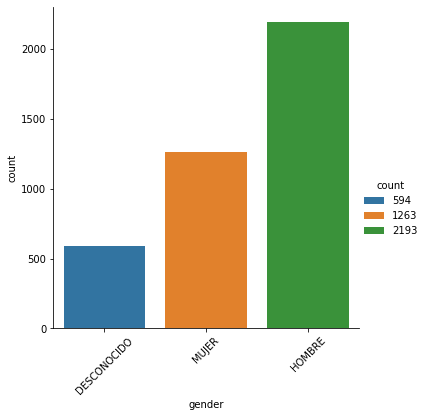

In [33]:
# Sección encargada de la gráfica
sns.catplot(x = "gender", y = "count", kind = "bar", data = datosGenero,  hue="count", dodge=False);
plt.xticks(rotation=45)
plt.show()


### Cantidad de delitos y la tasa de ocupación para los 10 distritos con más delitos

El tema de la criminalidad está muy relacionada con el tema poblacional, y principalmente con la economía, por ende, entre más personas pobres esten viviendo en un lugar, más propenso es este lugar a tener un alto grado de criminalidad, donde se quiere hacer una comparación entre la cantidad de delitos en los lugares donde más son registrados y reportados, así como la tasa de la ocupación que hay en estos lugares.
Estos datos de obtienen después de hacer el procesamiento de la información en los documentos de criminalidad del OIJ y la relación poblacional del INEC.

In [34]:
topDistrict=[]

# Crea una variable conexión con la información de ingreso a la base de datos
conexion = psycopg2.connect(host="localhost", database="Proyecto3", user="postgres", password="Oracle1Oracle1")

cur = conexion.cursor()
    
# Ejecutamos una consulta
cur.execute( "SELECT count(delito) as c, (sum(tasaocupacion)/count(delito)) as d, distrito FROM public.economia group by distrito order by c desc limit 10;")


# Recorremos los resultados y los mostramos
for c, d, delito in cur.fetchall() :
    infoUni=[]
    infoUni.append(c)
    infoUni.append(float(d))
    infoUni.append(delito)
    topDistrict.append(infoUni)


#print(topDistrict)    

# Se asigna a topDelitosDistrito un DataFrame con el resultado de la consulta
topDelitosDistrito = pd.DataFrame(topDistrict, columns=['contDelito', 'conttasaOcupacion', 'distrito'])
print(topDelitosDistrito)

# Cerramos la conexión
conexion.close() 

   contDelito  conttasaOcupacion                  distrito
0         374          56.131611                san rafael
1         359          49.537078                   liberia
2         286          53.855069                  alajuela
3         262          49.321441  san isidro de el general
4         246          48.755414                 siquirres
5         243          57.027702                   heredia
6         200          54.706451              desamparados
7         160          58.129056                     uruca
8         153          57.358397                san isidro
9         143          46.059973                 turrialba


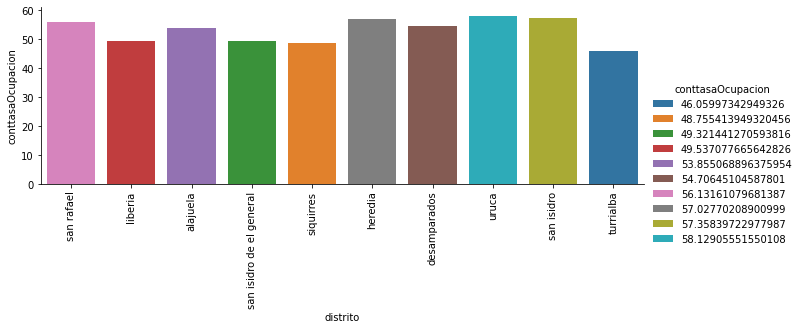

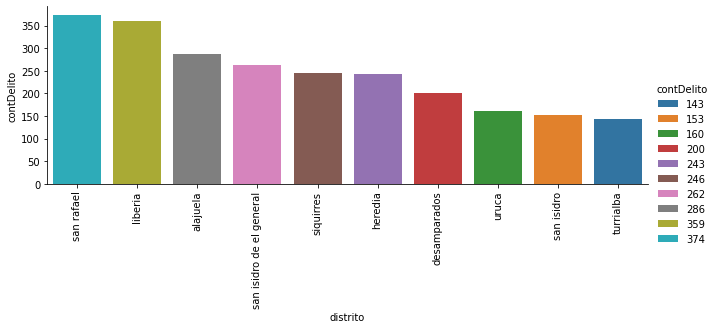

In [35]:
# Sección encargada de la gráfica
sns.catplot(data=topDelitosDistrito, x="distrito", y="conttasaOcupacion",  kind = "bar", hue="conttasaOcupacion", height = 3, aspect = 3, dodge=False)
plt.xticks(rotation=90)
plt.show()

# Sección encargada de la gráfica
sns.catplot(data=topDelitosDistrito, x="distrito", y="contDelito",  kind = "bar", hue="contDelito", height = 3, aspect = 3, dodge=False)
plt.xticks(rotation=90)
plt.show()

### Cantidad de delitos por tipo y por distrito

Durante el día nos enteramos que desafortunados acontesimientos en el país por medio de las noticias mayormente, donde se nos informa de delitos que pueden pasar en cualquier parte del país y de los cuales cualquier persona puede ser victima, y aunque estos delitos sobre diferentes entre si, pueden ser categorizados para poder ser analizados posteriormente y que sea posible buscar una forma de cotrarestarlos. Por eso, en esta evaluación se grafica la cantidad de delitos organizados por tipo para un distrito especifico.
Estos datos de obtienen después de hacer el procesamiento de la información en los documentos de criminalidad del OIJ y la relación poblacional del INEC.

In [36]:
byDistrict=[]

# Crea una variable conexión con la información de ingreso a la base de datos
conexion = psycopg2.connect(host="localhost", database="Proyecto3", user="postgres", password="Oracle1Oracle1")

cur = conexion.cursor()

# Se asigna en esta variable el distrito en el cuál se quiere hacer la evaluación
distritoBuscar="desamparados"

# Ejecutamos una consulta
cur.execute( "SELECT count(delito) as c, delito  FROM public.economia where distrito='"+distritoBuscar+"' group by delito;")


# Recorremos los resultados y los mostramos
for c, delito in cur.fetchall() :
    infoUni=[]
    infoUni.append(c)
    infoUni.append(delito)
    byDistrict.append(infoUni)


# Se asigna a delitosDistrito un DataFrame con el resultado de la consulta
delitosDistrito = pd.DataFrame(byDistrict, columns=['contDelito', 'delito'])
print(delitosDistrito)

# Cerramos la conexión
conexion.close() 

   contDelito             delito
0          14  TACHA DE VEHICULO
1          29   ROBO DE VEHICULO
2          61              HURTO
3          23               ROBO
4          69             ASALTO
5           4          HOMICIDIO


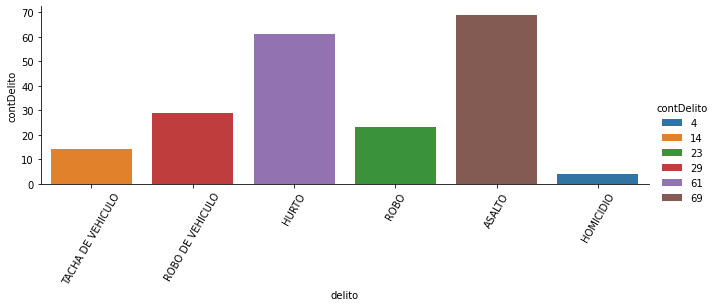

In [37]:
# Sección encargada de la gráfica
sns.catplot(x = "delito", y = "contDelito", kind = "bar", data = delitosDistrito,  hue="contDelito", height = 3, aspect = 3, dodge=False);
plt.xticks(rotation=60)
plt.show()

### Cantidad de delitos hechos por nacionalidad 

Con el tema de la movilidad global, ahora es posible ir a visitar casi cualquier parte del mundo y muchos paises que cuentan con ventajas llamativas pueden obtener una gran cantidad de turistas, o personas que vienen en busca de crear un hogar en el país, sin embargo, también hay que ser conscientes de que existen personas que están alojadas en otros paises talvez no de forma legal, que causan daños a la población, y aunque hablando desde un punto costarricense, se asocia que muchos de los crímenes son perpetrados por personas de nuestro país vecino, por lo que, en esa evaluación se busca constrastar la cantidad de delitos que son cometidos por personas nacionales y cuantos son responsabilidad de personas extranjeras.
Estos datos de obtienen después de hacer el procesamiento de la información en los documentos de criminalidad del OIJ y la relación poblacional del INEC.

In [38]:
byNacion=[]

# Crea una variable conexión con la información de ingreso a la base de datos
conexion = psycopg2.connect(host="localhost", database="Proyecto3", user="postgres", password="Oracle1Oracle1")

cur = conexion.cursor()
    
# Ejecutamos una consulta
cur.execute( "SELECT count(delito) as c, nacionalidad FROM public.economia group by nacionalidad;")


# Recorremos los resultados y los mostramos
for c, nacionalidad in cur.fetchall() :
    infoUni=[]
    infoUni.append(c)
    infoUni.append(nacionalidad)
    byNacion.append(infoUni)


# Se asigna a delitosNacionalidad un DataFrame con el resultado de la consulta
delitosNacionalidad = pd.DataFrame(byNacion, columns=['contDelito', 'nacionalidad'])
print(delitosNacionalidad)

# Cerramos la conexión
conexion.close() 

    contDelito            nacionalidad
0            1                  SUECIA
1            3                   RUSIA
2            4                HONDURAS
3            4                  ITALIA
4            3               ARGENTINA
5            5             EL SALVADOR
6          157             Desconocido
7           25          ESTADOS UNIDOS
8           14                 FRANCIA
9            1    REPUBLICA DOMINICANA
10           1                   GHANA
11           2                  MEXICO
12           8                   CHINA
13           2                   SUIZA
14         283               NICARAGUA
15           5                  ESPANA
16           1                 POLONIA
17           2  PAISES BAJOS (HOLANDA)
18           1               GUATEMALA
19           1                  TAIWAN
20           7                ALEMANIA
21           4              INGLATERRA
22           1               AUSTRALIA
23          29               VENEZUELA
24           2           

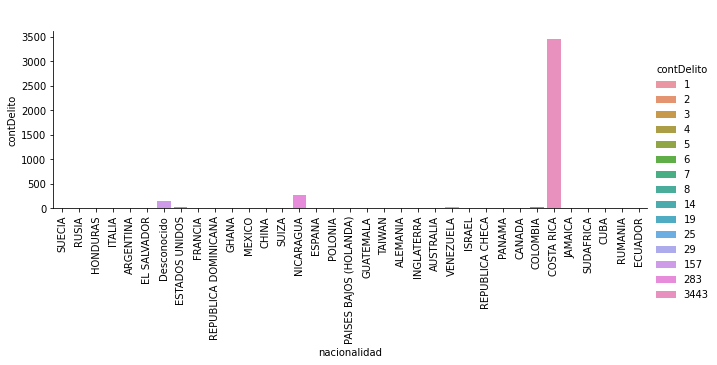

In [39]:
# Sección encargada de la gráfica
sns.catplot(x = "nacionalidad", y = "contDelito", kind = "bar", data = delitosNacionalidad, hue="contDelito", height = 3, aspect = 3, dodge=False);
plt.xticks(rotation=90)
plt.show()

 ## Conclusiones

Esta aplicación se lleva a cabo con la intención de comprender como la tasa poblacional de un país está directamente relacionada con el nivel de delitos que ocurren en dicho país, en esta evaluación tomamos la información de datos recolectados y de acceso público de la página del OIJ y también de la página del INEC, y haciendo uso de la herramienta spark se logró hacer la consulta sobre varios factores que podrían solucionar algunas de las dudas que pueden surgir eventualmente en la sociedad o al momento de querer enfrentar delitos en nuestro país como lo son:
        
        
* Delitos por Género:

Comúnmente vemos que el género masculino es a quien se responsabiliza por los delitos que puedan llegar a ser cometidos, y con esta evaluación, la intensión principal es desmentir o confirmar esa aseveración. Para poder ver los resultados obtenidos se recurrio a la información brindada por la página del OIJ sobre los delitos que son reportados y por medio de una gráfica se evidencia que la afirmación es correcta, donde la participación de personas masculinas en hechos delictivos es considerablemente mayor comparandola con la participación femenina. "En el caso de los hombres hay una tendencia más acusada a la violencia física, hay menos autocontrol, es más impulsivo, sin embargo las mujeres son más sutiles, más calculadoras. Recurren menos a la violencia física directa. Es una cuestión del rol y también de genética". (España Negra, 2021)
            
* Delitos por nacionalidad:

Igualmente que en el caso anterior, muchos de los delitos que ocurren se sabe que son cometidos por personas de nuestro propio país, sin embargo, también se tacha a muchos extranjeros como responsables que arremeter contra la seguridad de la población, por ende, haciendo uso del gráfico la intensión de contrastar esta afirmación con la información de delitos comentidos por costarricenses, vemos una diferencia notable en cuanto a la cantidad de delitos hechos por extranjeros con los cometidos por personas de nuestro propio país, y aunque la mayoría de estos delitos es dicho que son cometidos por personas del país vecino, no solo este tiene record de participación delictiva en Costa Rica.
            
            
* Tipos de delito:

Desgraciadamente muchos son los delitos que ocurren en un día en nuestro país, y diferentes por si mismos, sin embargo, podemos categorizar los delitos ocurridos para así llevar un mejor registro de la situación delictiva de nuestro país, en este caso, con la evaluación realizada, vemos que hay un acto que sobresale y es el asalto, donde se despoja por la fuerza de las pertenencias a la victima, este acto es mayormente realizado con armas de fuego o armas blancas, las cuales son usadas con la intensión de amedrentar inmediatamente a la victima y que sea más sencillo conseguir su objetivo.
             
De esta forma vemos como muchos factores son presentados cuando se quiere hablar sobre la delincuencia, el nivel económico y social son de los principales factores responsables del aumento o disminución de estas prácticas queu van en contra de lo que las buenas costumbres dictan para una sociedad civilizada.

### Referencias

Barredo, A. (2021). La ciencia explica por qué los hombres cometen muchos más crímenes que las mujeres. Hipertextual. Recuperado de: https://hipertextual.com/2016/02/crimenes-hombres

España negra: crimen sin fronteras y narcotráfico. Edita: Eolas & menoslobos; colección Línea negra, 2021. Directora de la colección: Maica Rivera. ISBN: 978-84-18079-91-7. 

Instituto Nacional de Estadísticas y Censos (2011). Censo 2011: Indicadores
económicos, según provincia, cantón y distrito. Recuperado de
http://inec.cr/documento/censo-2011-indicadores-economicos-segun-provincia-canton-ydistrito

Microsoft. (2020). Analyze data with Apache Spark. Docs.microsoft.com. Recuperado de: 
https://docs.microsoft.com/en-us/azure/synapse-analytics/spark/apache-spark-data-visualization-tutorial

Organismo de Investigación Judicial (2018). Estadísticas poiciales. Recuperado de
https://sitiooij.poder-judicial.go.cr/index.php/apertura/transparencia/estadisticas-policiales

Ramírez de Garay, Luis David. (2014). Crimen y economía: una revisión crítica de las explicaciones económicas del crimen. Argumentos (México, D.F.), 27(74), 261-290. Recuperado de http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0187-57952014000100010&lng=es&tlng=es.

Spark. (n.f). Spark SQL. Apache Spark. Recuperado de: 
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.html

Suhong, K., Param, J., Parminder, K. y Pooya, T. (2018).Crime Analysis Through
Machine Learning. IEEE 9th Annual Information Technology, Electronics and Mobile Communication Conference (IEMCON) 
        
Wikipedia contributors. (2021, June 12). Apache Spark. In Wikipedia, The Free Encyclopedia. Retrieved from https://en.wikipedia.org/w/index.php?title=Apache_Spark&oldid=1028264650